**Ref**. https://timeseriesreasoning.com/contents/time-series-decomposition/

<ipython-input-14-dd0763e4146b>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  mydateparser = lambda x: pd.datetime.strptime(x, '%d-%m-%y')


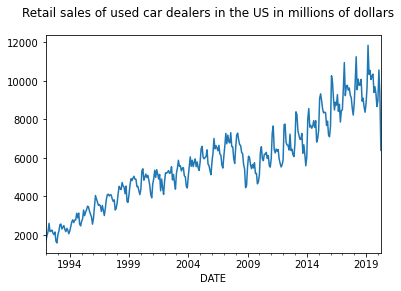

In [14]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Construct the date parser
mydateparser = lambda x: pd.datetime.strptime(x, '%d-%m-%y')

# Load the data set into a pandas data frame
df = pd.read_csv('retail_sales_used_car_dealers_us_1992_2020.csv', header=0, index_col=0, parse_dates=['DATE'], date_parser=mydateparser)

# Plot the data set
fig = plt.figure()
fig.suptitle('Retail sales of used car dealers in the US in millions of dollars')
df['Retail_Sales'].plot()
plt.show()

# MA

<ipython-input-15-ee1d3e1e0ed9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['2 x 12 CMA (TREND)'][i] = df['Retail_Sales'][i - 6] * 1.0 / 24 + (


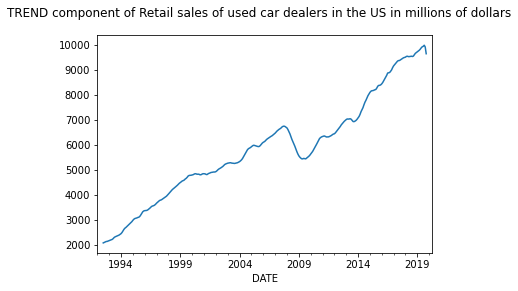

In [15]:
# Add a column containing a 2 x 12 centered moving average. 
# This column will capture the trend component in the time series
df['2 x 12 CMA (TREND)'] = np.nan

for i in range(6, df['Retail_Sales'].size - 6):
    df['2 x 12 CMA (TREND)'][i] = df['Retail_Sales'][i - 6] * 1.0 / 24 + (
        df['Retail_Sales'][i - 5] + df['Retail_Sales'][i - 4] + df['Retail_Sales'][i - 3] + df['Retail_Sales'][i - 2] + 
        df['Retail_Sales'][i - 1] + df['Retail_Sales'][i] + df['Retail_Sales'][i + 1] + df['Retail_Sales'][i + 2] + 
        df['Retail_Sales'][i + 3] + df['Retail_Sales'][i + 4] + df['Retail_Sales'][i + 5]) * 1.0 / 12 + df['Retail_Sales'][i + 6] * 1.0 / 24

# Plot the trend component
fig = plt.figure()
fig.suptitle('TREND component of Retail sales of used car dealers in the US in millions of dollars')
df['2 x 12 CMA (TREND)'].plot()
plt.show()

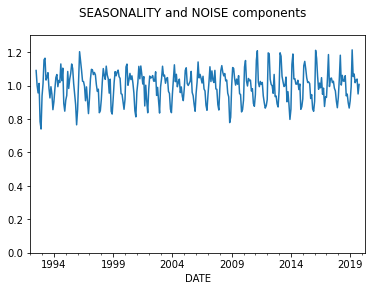

In [16]:
# Calculate the seasonality and noise components
df['SEASONALITY AND NOISE'] = df['Retail_Sales'] / df['2 x 12 CMA (TREND)']

# Plot the seasonality and noise components
fig = plt.figure()
fig.suptitle('SEASONALITY and NOISE components')
plt.ylim(0, 1.3)
df['SEASONALITY AND NOISE'].plot()
plt.show()

<ipython-input-17-8c2d3268dea2>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['MONTH'] = df.index.strftime('%m').astype(np.int)
<ipython-input-17-8c2d3268dea2>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SEASONALITY'][i] = average_seasonal_values[df['MONTH'][i]]


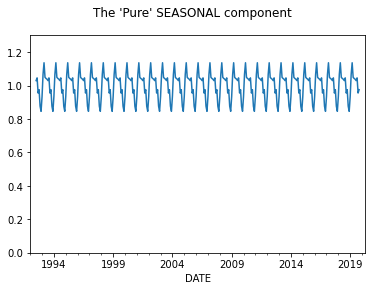

In [17]:
# Calculate the average seasonal component for each month
df['MONTH'] = df.index.strftime('%m').astype(np.int)

average_seasonal_values = {i: 0 for i in range(1, 13)}
average_seasonal_value_counts = {i: 0 for i in range(1, 13)}

# Calculate the sums and counts
for i in range(df['SEASONALITY AND NOISE'].size):
    if not math.isnan(df['SEASONALITY AND NOISE'][i]):
        average_seasonal_values[df['MONTH'][i]] += df['SEASONALITY AND NOISE'][i]
        average_seasonal_value_counts[df['MONTH'][i]] += 1

# Calculate the average seasonal component for each month
for i in range(1, 13):
    average_seasonal_values[i] /= average_seasonal_value_counts[i]

# Create a new column in the data frame and fill it with the value of the average seasonal component for the corresponding month
df['SEASONALITY'] = np.nan
for i in range(df['SEASONALITY AND NOISE'].size):
    if not math.isnan(df['SEASONALITY AND NOISE'][i]):
        df['SEASONALITY'][i] = average_seasonal_values[df['MONTH'][i]]

# Plot the seasonal component
fig = plt.figure()
fig.suptitle('The \'Pure\' SEASONAL component')
plt.ylim(0, 1.3)
df['SEASONALITY'].plot()
plt.show()

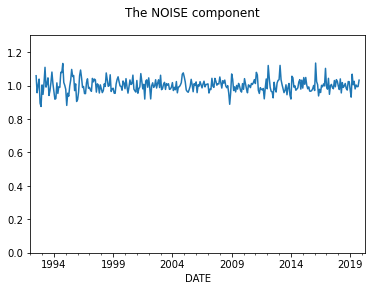

In [18]:
# Calculate the noise component
df['NOISE'] = df['SEASONALITY AND NOISE'] / df['SEASONALITY']

# Plot the noise component
fig = plt.figure()
fig.suptitle('The NOISE component')
plt.ylim(0, 1.3)
df['NOISE'].plot()
plt.show()

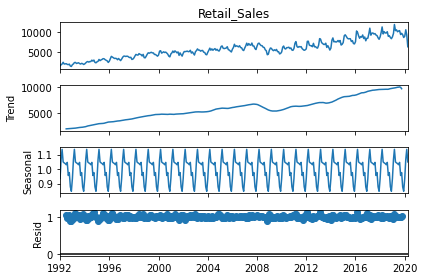

In [19]:
# Perform seasonal decomposition using statsmodels
components = seasonal_decompose(df['Retail_Sales'], model='multiplicative')
components.plot()
plt.show()
